In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("df_model.csv")

In [69]:
df

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,clean_text
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97,someone shared drone delivery already happenin...
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107,someone shared microorganism one teaspoon soil...
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137,someone shared american industrialist andrew c...
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131,someone shared metro st petersburg average dep...
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128,someone shared number business allowing employ...
...,...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,not verified,active,6067.0,423.0,81.0,8.0,2.0,65,opinion earth hold 11 quintillion pound air
19080,opinion,23,not verified,active,2973.0,820.0,70.0,3.0,0.0,66,opinion queen ant colony live around 30 year
19081,opinion,50,not verified,active,734.0,102.0,7.0,2.0,1.0,53,opinion moon moving away earth
19082,opinion,8,not verified,active,3394.0,655.0,123.0,11.0,4.0,80,opinion lightning strike somewhere earth 100 t...


We need to prepare the data for prediction model

We will start with encoding categorical columns

In [70]:
# Binary encoding for claim_status and verified_status
df["claim_status"] = df["claim_status"].map({"claim": 1, "opinion": 0})
df["verified_status"] = df["verified_status"].map({"not verified": 0, "verified": 1})

# One-Hot Encoding for author_ban_status
df = pd.get_dummies(df, columns=["author_ban_status"], drop_first=True)  

df.head()

,claim_status,video_duration_sec,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,clean_text,author_ban_status_banned,author_ban_status_under review
0,1,59,0,343296.0,19425.0,241.0,1.0,0.0,97,someone shared drone delivery already happenin...,0,1
1,1,32,0,140877.0,77355.0,19034.0,1161.0,684.0,107,someone shared microorganism one teaspoon soil...,0,0
2,1,31,0,902185.0,97690.0,2858.0,833.0,329.0,137,someone shared american industrialist andrew c...,0,0
3,1,25,0,437506.0,239954.0,34812.0,1234.0,584.0,131,someone shared metro st petersburg average dep...,0,0
4,1,19,0,56167.0,34987.0,4110.0,547.0,152.0,128,someone shared number business allowing employ...,0,0


Lets now break the data into train, validation, and test sets. (60,20,20) split.

In [72]:
y = df['claim_status']
X = df.drop(['claim_status'], axis=1)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

Now, we will vectorize our text column. We will use CountVectorizer. We will do it separately for train, validation, and test data

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [75]:
count_data = count_vec.fit_transform(X_train['clean_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned medium,medium claim,news claim,point view,read medium,social medium,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
X_train_final = pd.concat([X_train.drop(columns=['clean_text']).reset_index(drop=True), count_df], axis=1)
X_train_final.head()

,video_duration_sec,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned medium,medium claim,news claim,point view,read medium,social medium,willing wager
0,51,0,2487.0,310.0,20.0,1.0,0.0,134,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,118512.0,3543.0,374.0,70.0,29.0,97,1,0,...,0,1,0,0,0,0,0,0,0,0
2,22,0,105902.0,1885.0,229.0,39.0,9.0,76,0,1,...,0,1,0,0,0,0,0,0,0,0
3,17,0,9245.0,1670.0,440.0,13.0,4.0,58,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,0,3791.0,660.0,63.0,9.0,1.0,57,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
validation_count_data = count_vec.transform(X_val['clean_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned medium,medium claim,news claim,point view,read medium,social medium,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [80]:
X_val_final = pd.concat([X_val.drop(columns=['clean_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned medium,medium claim,news claim,point view,read medium,social medium,willing wager
0,11,0,578891.0,311333.875,14612.0,2880.125,44.0,72,0,1,...,0,0,0,0,0,0,0,1,0,0
1,24,0,6255.0,1709.000,311.0,13.000,1.0,96,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,0,410356.0,249714.000,26235.0,2060.000,728.5,88,0,0,...,0,1,0,0,0,0,0,1,0,0
3,58,0,406911.0,25986.000,1230.0,564.000,248.0,83,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,0,972573.0,138167.000,25320.0,2880.125,728.5,104,0,1,...,0,0,0,0,0,0,0,1,0,0


In [81]:
# Extract numerical features from `clean_text` in the testing set
test_count_data = count_vec.transform(X_test['clean_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['clean_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned medium,medium claim,news claim,point view,read medium,social medium,willing wager
0,54,0,692084.0,135956.000,16591.0,622.000,312.0,107,0,0,...,0,0,0,1,1,0,0,0,0,0
1,37,1,5164.0,1858.000,36.0,17.000,1.0,69,0,1,...,0,0,0,0,0,0,0,0,0,0
2,39,0,801951.0,311333.875,45382.5,2880.125,728.5,90,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,6429.0,2314.000,847.0,17.000,5.0,76,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,0,555780.0,106863.000,15348.0,252.000,91.0,72,0,0,...,0,0,0,0,0,0,0,0,0,0


Text has been vectorized and top 15 features are selected.

We will now set the random forest classifier

In [82]:
# random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [83]:
%%time
rf_cv.fit(X_train_final, y_train)

Wall time: 7min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [84]:
rf_cv.best_score_

0.9948228253467271

In [85]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [86]:
# Access the GridSearch results and convert it to a pandas df
rf_results_df = pd.DataFrame(rf_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
rf_results_df['mean_test_precision'][rf_cv.best_index_]

0.9994805124528201

Setting up the XGBoost classifier

In [87]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [88]:
%%time
xgb_cv.fit(X_train_final, y_train)

Wall time: 2min 21s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [89]:
xgb_cv.best_score_

0.9898176171763818

In [90]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

In [91]:
# Access the GridSearch results and convert it to a pandas df
xgb_results_df = pd.DataFrame(xgb_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
xgb_results_df['mean_test_precision'][xgb_cv.best_index_]

0.9993029768429176

Prediction using Random forest in validation data

In [92]:
y_pred = rf_cv.best_estimator_.predict(X_val_final)

In [93]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

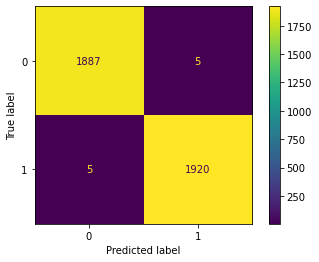

In [95]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Only 10 incorrect predictions. That's incredible performance.

In [96]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Model works almost perfectly

Prediction using XGBoost

In [97]:
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

In [98]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

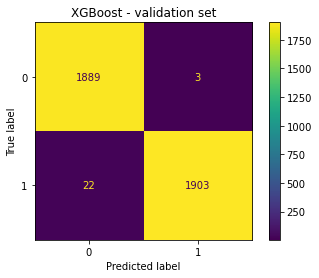

In [99]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

This is also an incredible performance but Random forest outperforms it

In [100]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



Running best model (Random forest) on test data

In [101]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

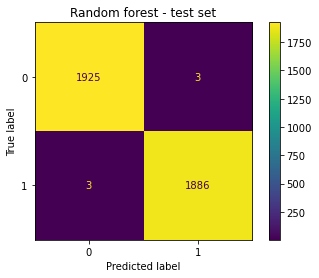

In [102]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

Again a near perfect performance on test data

We will now get the feature importance

video_view_count                  0.678331
video_like_count                  0.170765
video_download_count              0.087994
video_share_count                 0.046453
medium claim                      0.002400
discussion board                  0.001945
text_length                       0.001913
colleague read                    0.001367
social medium                     0.001205
discovered news                   0.001200
news claim                        0.001036
friend read                       0.000886
internet forum                    0.000829
video_comment_count               0.000741
friend learned                    0.000691
read medium                       0.000553
video_duration_sec                0.000540
colleague learned                 0.000519
colleague discovered              0.000399
learned medium                    0.000112
author_ban_status_under review    0.000049
author_ban_status_banned          0.000042
verified_status                   0.000014
willing wag

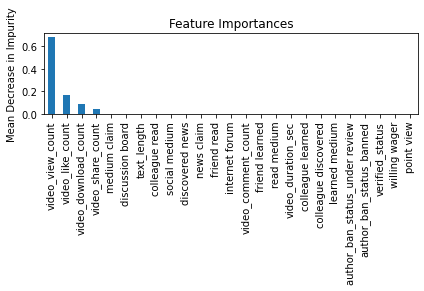

In [104]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

# Sort feature importances in descending order
rf_importances = rf_importances.sort_values(ascending=False)

# Print feature importances
print(rf_importances)

# Plot
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')

fig.tight_layout()
plt.show()

The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

The model almost successfully classified claims and opinions both on validation and test data